## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
merge_table = pd.merge(mouse_metadata, study_results, on="Mouse ID")

In [17]:
# Header and number of row check (1893)
merge_table.head()
# merge_table

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Grouping data by drug regimen
drug_group = merge_table.groupby('Drug Regimen')
drug_group.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


## Summary statistics

In [4]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# created statsummary function to get mean, median, variance, stdev, and aggregate them, creating a series
# SEM function does not work within the rest, so added afterwards as a column to the dataframe
def statsummary(x):
    column_names = {
        'Mean': x['Tumor Volume (mm3)'].aggregate(np.mean),
        'Median': x['Tumor Volume (mm3)'].aggregate(np.median),
        'Variance': x['Tumor Volume (mm3)'].aggregate(np.var),
        'Standard Deviation': x['Tumor Volume (mm3)'].aggregate(np.std)}
    return pd.Series(column_names,index=['Mean','Median','Variance','Standard Deviation'])
drug_summary = drug_group.apply(statsummary)
drug_summary['SEM'] = drug_group['Tumor Volume (mm3)'].aggregate(st.sem)
# Formatting to look cleaner
drug_summary = drug_summary.applymap('{:,.2f}'.format)
drug_summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar plots

Text(0, 0.5, 'Number of Data Points')

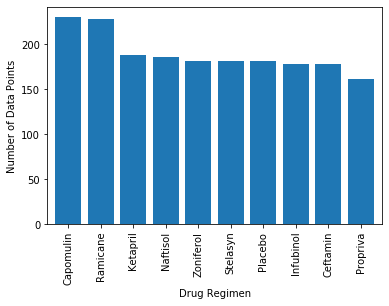

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
# creating series bar_data by value_count original merge_table
bar_data = merge_table['Drug Regimen'].value_counts()
pd_bar = bar_data.plot.bar(width=0.8) # set width to 0.8 to match default matplotlib width
pd_bar.set_xlabel('Drug Regimen')
pd_bar.set_ylabel('Number of Data Points')

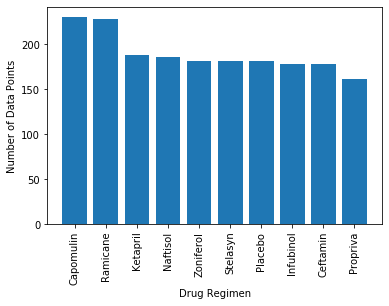

In [6]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
# created regimens to not affect bar_data series and utilize index due to being in correct descending order for x-axis
regimens = bar_data
regimens_axis = regimens.index
plt.bar(regimens_axis,bar_data)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')
plt.xticks(rotation=90)
plt.show()

## Pie plots

Text(0, 0.5, '')

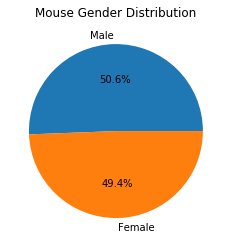

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# create data for male and female count
pie_data = merge_table['Sex'].value_counts()
total_mice = merge_table['Mouse ID'].count()
male_mice = pie_data['Male']
female_mice = pie_data['Female']
percent_male = male_mice/total_mice
percent_female = female_mice/total_mice

pd_pie = pie_data.plot.pie(title='Mouse Gender Distribution',autopct='%1.1f%%',legend=False)
pd_pie.set_ylabel('')


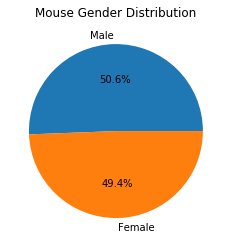

In [8]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(pie_data, labels=pie_data.index,autopct='%1.1f%%')
plt.title('Mouse Gender Distribution')
plt.show()

## Quartiles, outliers and boxplots

In [9]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
def change(x):
    column_names = {
        'Initial': float(x['Tumor Volume (mm3)'].head(1)),
        'Final': float(x['Tumor Volume (mm3)'].tail(1))}
    return pd.Series(column_names,index=['Initial','Final'])
change_df = drug_group.apply(change)
change_df['Change'] = change_df['Final'] - change_df['Initial']
change_df = change_df.sort_values('Change')
change_df

,Initial,Final,Change
Drug Regimen,,,
Ramicane,45.0,44.183451,-0.816549
Stelasyn,45.0,45.934712,0.934712
Capomulin,45.0,46.539206,1.539206
Zoniferol,45.0,48.077646,3.077646
Propriva,45.0,48.710661,3.710661
Infubinol,45.0,62.754451,17.754451
Ketapril,45.0,62.909441,17.909441
Ceftamin,45.0,64.729837,19.729837
Placebo,45.0,66.842635,21.842635


In [10]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.

change_df['Lower Q'] = merge_table.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].quantile(0.25)
change_df['Upper Q'] = merge_table.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].quantile(0.75)
change_df['IQR'] = change_df['Upper Q'] - change_df['Lower Q']
change_df['Lower Bound'] = change_df['Lower Q'] - (1.5*change_df['IQR'])
change_df['Upper Bound'] = change_df['Upper Q'] + (1.5*change_df['IQR'])
change_df

,Initial,Final,Change,Lower Q,Upper Q,IQR,Lower Bound,Upper Bound
Drug Regimen,,,,,,,,
Ramicane,45.0,44.183451,-0.816549,36.674635,45.000000,8.325365,24.186586,57.488048
Stelasyn,45.0,45.934712,0.934712,48.047139,58.719297,10.672158,32.038901,74.727535
Capomulin,45.0,46.539206,1.539206,37.685933,45.000000,7.314067,26.714832,55.971101
Zoniferol,45.0,48.077646,3.077646,47.337876,57.954259,10.616383,31.413302,73.878833
Propriva,45.0,48.710661,3.710661,47.081086,56.184664,9.103578,33.425719,69.840031
Infubinol,45.0,62.754451,17.754451,47.312353,57.314444,10.002091,32.309217,72.317580
Ketapril,45.0,62.909441,17.909441,48.232987,60.870951,12.637964,29.276042,79.827897
Ceftamin,45.0,64.729837,19.729837,47.208427,56.801438,9.593010,32.818911,71.190953
Placebo,45.0,66.842635,21.842635,47.459053,59.916934,12.457882,28.772231,78.603757


In [11]:
# Merging stat summary and above tables to verify any weird looking data
full_stat_summary = pd.merge(drug_summary, change_df, on="Drug Regimen")
full_stat_summary.drop(columns=['Lower Q','Upper Q','IQR',])

,Mean,Median,Variance,Standard Deviation,SEM,Initial,Final,Change,Lower Bound,Upper Bound
Drug Regimen,,,,,,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33,45.0,46.539206,1.539206,26.714832,55.971101
Ceftamin,52.59,51.78,39.29,6.27,0.47,45.0,64.729837,19.729837,32.818911,71.190953
Infubinol,52.88,51.82,43.13,6.57,0.49,45.0,62.754451,17.754451,32.309217,72.317580
Ketapril,55.24,53.70,68.55,8.28,0.60,45.0,62.909441,17.909441,29.276042,79.827897
Naftisol,54.33,52.51,66.17,8.13,0.60,45.0,73.867845,28.867845,28.270134,78.978774
Placebo,54.03,52.29,61.17,7.82,0.58,45.0,66.842635,21.842635,28.772231,78.603757
Propriva,52.32,50.85,42.35,6.51,0.51,45.0,48.710661,3.710661,33.425719,69.840031
Ramicane,40.22,40.67,23.49,4.85,0.32,45.0,44.183451,-0.816549,24.186586,57.488048
Stelasyn,54.23,52.43,59.45,7.71,0.57,45.0,45.934712,0.934712,32.038901,74.727535


### Quantitative analysis
* The top 4 drugs by change in tumor size (lower being better) as well as final tumor volume are:
Ramicane, Stelasyn, Capomulin, and Zoniferol

* Note that the mean and median tumor sizes for Ramicane and Capomulin are lower than both the initial and final sizes, meaning that the tumors likely shrank and then grew.

* Opposite of Ramicane and Capomulin, Stelasyn and Zoniferol mice appear to have had tumors that grew and then shrank before the end of the test period

In [12]:
# full summary table for statistics values
full_stat_summary.sort_values('Change')


,Mean,Median,Variance,Standard Deviation,SEM,Initial,Final,Change,Lower Q,Upper Q,IQR,Lower Bound,Upper Bound
Drug Regimen,,,,,,,,,,,,,
Ramicane,40.22,40.67,23.49,4.85,0.32,45.0,44.183451,-0.816549,36.674635,45.000000,8.325365,24.186586,57.488048
Stelasyn,54.23,52.43,59.45,7.71,0.57,45.0,45.934712,0.934712,48.047139,58.719297,10.672158,32.038901,74.727535
Capomulin,40.68,41.56,24.95,4.99,0.33,45.0,46.539206,1.539206,37.685933,45.000000,7.314067,26.714832,55.971101
Zoniferol,53.24,51.82,48.53,6.97,0.52,45.0,48.077646,3.077646,47.337876,57.954259,10.616383,31.413302,73.878833
Propriva,52.32,50.85,42.35,6.51,0.51,45.0,48.710661,3.710661,47.081086,56.184664,9.103578,33.425719,69.840031
Infubinol,52.88,51.82,43.13,6.57,0.49,45.0,62.754451,17.754451,47.312353,57.314444,10.002091,32.309217,72.317580
Ketapril,55.24,53.70,68.55,8.28,0.60,45.0,62.909441,17.909441,48.232987,60.870951,12.637964,29.276042,79.827897
Ceftamin,52.59,51.78,39.29,6.27,0.47,45.0,64.729837,19.729837,47.208427,56.801438,9.593010,32.818911,71.190953
Placebo,54.03,52.29,61.17,7.82,0.58,45.0,66.842635,21.842635,47.459053,59.916934,12.457882,28.772231,78.603757


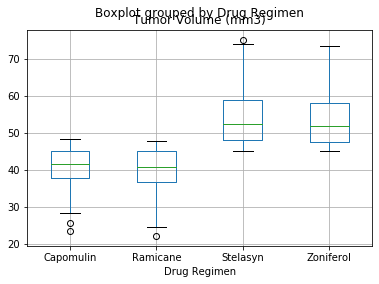

In [28]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# Drop rows of drugs not being used in boxplot
boxplot_df = merge_table.drop(merge_table.index[(merge_table['Drug Regimen'] != 'Ramicane') & 
                                                (merge_table['Drug Regimen'] != 'Stelasyn') &
                                               (merge_table['Drug Regimen'] != 'Capomulin') & 
                                               (merge_table['Drug Regimen'] != 'Zoniferol')])
boxplot_df.boxplot(column='Tumor Volume (mm3)', by="Drug Regimen")
boxplot_df.set_ylabel('Final Tumor Volume')


## Line and scatter plots

In [9]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [10]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [11]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen